<a href="https://colab.research.google.com/github/Davron030901/PyTorch/blob/main/39_Facial_Recognition_with_VGGFace_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Facial Recognition with VGGFace in Keras**

---


In this lesson, we use **Facial Recognition with VGGFace in Keras** to compare facial similarity. We load a pre-trained model of VGGFace (trainined on thousands of faces) and use it, together with a similarity metric, to define whether two faces are of the same person.

1. Download our data, and import our modules
2. Define our VGGFace Model and load our weights
3. Create our cosine distance function
4. Verify Facial Similarity
5. Facial Recognition with One Shot Learning
6. Test model using your Webcam
7. Test on video from the Friends TV show

Related Paper - https://www.robots.ox.ac.uk/~vgg/publications/2015/Parkhi15/parkhi15.pdf


## **1. Download our data, and import our modules**

In [ ]:
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/face_recognition.zip
!unzip -q face_recognition.zip

--2025-05-02 19:03:13--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/face_recognition.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.143.94, 3.5.246.197, 52.95.148.70, ...
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.143.94|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-05-02 19:03:14 ERROR 404: Not Found.

unzip:  cannot find or open face_recognition.zip, face_recognition.zip.zip or face_recognition.zip.ZIP.


In [ ]:
# Import our libraries
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os
import cv2

## **2. Define our VGGFace Model and load our weights**

In [ ]:
# Create our VGGFace model
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/zero_padding2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### **Load our VGG Face Weights**

We don't need to train our model if we can get the already trained 'weights'.

In [ ]:
vggface_url = "https://drive.google.com/file/d/1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo/view?usp=sharing"
print("Weights can be downloaded from:", vggface_url)

# Gdown orqali yuklab olish
!gdown --id 14eHppxprE1sCWmnjQ7LuijhAZQlb_Quz

Weights can be downloaded from: https://drive.google.com/file/d/1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo/view?usp=sharing
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=14eHppxprE1sCWmnjQ7LuijhAZQlb_Quz
From (redirected): https://drive.google.com/uc?id=14eHppxprE1sCWmnjQ7LuijhAZQlb_Quz&confirm=t&uuid=ba1d7f69-8540-4bac-a5a4-a422e533ae0e
To: /content/vgg_face_weights.h5
100% 580M/580M [00:09<00:00, 60.5MB/s]


In [ ]:
# Load our VGG Face Weights
model.load_weights('vgg_face_weights.h5')

## **3. Create our cosine distance function**

![Image of Cosine Similarity](https://raw.githubusercontent.com/rajeevratan84/DeepLearningCV/master/cosine.JPG)
![Image of Cosine Similarity Formula](https://raw.githubusercontent.com/rajeevratan84/DeepLearningCV/master/cosinesim.JPG)

In [ ]:
# Create our cosine distance function
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

def findCosineSimilarity(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

# Our model that outputs the 2,622 embedding vector
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)


## **4. Verify Facial Similarity**

#### **Define our verifyFace function where we load to images of faces and compare them.**

We set **epsilon** to be the threshold of whether our two faces are the same person. Setting a lower value makes it more strict with our face matching.

In [ ]:

# Define our verifyFace function
epsilon = 0.40  # o'xshashlik chegarasi - kamroq qiymati qattiqroq taqqoslashni bildiradi

def verifyFace(img1, img2):
    # Get embedding/encoding for face1 and face2
    img1_representation = vgg_face_descriptor.predict(preprocess_image('./training_faces/%s' % (img1)))[0,:]
    img2_representation = vgg_face_descriptor.predict(preprocess_image('./training_faces/%s' % (img2)))[0,:]

    # Calculate the cosine similarity between the two embeddings
    cosine_similarity = findCosineSimilarity(img1_representation, img2_representation)

    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(image.load_img('./training_faces/%s' % (img1)))
    plt.xticks([]); plt.yticks([])
    f.add_subplot(1,2, 2)
    plt.imshow(image.load_img('./training_faces/%s' % (img2)))
    plt.xticks([]); plt.yticks([])
    plt.show(block=True)

    print("Cosine similarity: ", cosine_similarity)

    # If similarity score is less than the epsilon threshold
    if(cosine_similarity < epsilon):
        print("Ular bir xil odam")
    else:
        print("Ular bir xil odam emas!")

### **Let's a run a few tests**

In [ ]:
# Face extraction kerakli funksiyalari
def makedir(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        return None
    else:
        pass

# Utility function for matplotlib
def imshow(title="Image", image=None, size=8):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Extract faces from images in the people directory
def extract_faces_from_directory(input_dir, output_dir):
    from os import listdir
    from os.path import isfile, join

    # Make sure output directory exists
    makedir(output_dir)

    # Loading HAARCascade Face Detector
    face_detector = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')

    # Directory of images of persons we'll be extracting faces from
    image_file_names = [f for f in listdir(input_dir) if isfile(join(input_dir, f))]
    print("Collected " + str(len(image_file_names)) + " images")

    extracted_faces = []

    for image_name in image_file_names:
        person_image = cv2.imread(input_dir + image_name)
        face_info = face_detector.detectMultiScale(person_image, 1.3, 5)

        if len(face_info) == 0:
            print(f"No face detected in {image_name}")
            continue

        for (x, y, w, h) in face_info:
            face = person_image[y:y+h, x:x+w]
            roi = cv2.resize(face, (128, 128), interpolation=cv2.INTER_CUBIC)

            path = output_dir + "face_" + image_name
            cv2.imwrite(path, roi)
            extracted_faces.append(path)
            print(f"Extracted face from {image_name} saved to {path}")

    return extracted_faces

# Load faces and create face embeddings
def load_face_embeddings(faces_dir):
    from os import listdir

    all_people_faces = dict()

    for file in listdir(faces_dir):
        try:
            person_face, extension = file.split(".")
            all_people_faces[person_face] = vgg_face_descriptor.predict(
                preprocess_image(f'{faces_dir}/{file}')
            )[0,:]
        except Exception as e:
            print(f"Error processing {file}: {e}")

    print(f"Loaded {len(all_people_faces)} face embeddings successfully")
    return all_people_faces

# Webcam facial recognition
def recognize_face_in_image(image_path, face_embeddings, threshold=0.35):
    """
    Image da yuzni tanish uchun funksiya
    """
    # Loading HAARCascade Face Detector
    face_detector = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')

    img = cv2.imread(image_path)
    faces = face_detector.detectMultiScale(img, 1.3, 5)

    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)  # draw rectangle
        detected_face = img[int(y):int(y+h), int(x):int(x+w)]  # crop detected face
        detected_face = cv2.resize(detected_face, (224, 224))  # resize to 224x224

        img_pixels = image.img_to_array(detected_face)
        img_pixels = np.expand_dims(img_pixels, axis=0)
        img_pixels /= 255

        captured_representation = vgg_face_descriptor.predict(img_pixels)[0,:]

        found = 0
        for i in face_embeddings:
            person_name = i
            representation = face_embeddings[i]

            similarity = findCosineSimilarity(representation, captured_representation)
            if similarity < threshold:
                cv2.putText(img, person_name[5:], (int(x+w+15), int(y-12)),
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
                found = 1
                break

        # connect face and text
        cv2.line(img, (int((x+x+w)/2), y+15), (x+w, y-20), (255, 0, 0), 1)
        cv2.line(img, (x+w, y-20), (x+w+10, y-20), (255, 0, 0), 1)

        if found == 0:  # if found image is not in our people database
            cv2.putText(img, 'unknown', (int(x+w+15), int(y-12)),
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    return img

# Main execution function

print("VGGFace modelini muvaffaqiyatli yuklandi")
print("Endi test qilib ko'rish mumkin")

# Example usage for testing the model
print("\nMa'lumotlar yuklashdan so'ng:")
print("1. verifyFace('test_img1.jpg', 'test_img2.jpg') - ikki rasm solishtirish")
print("2. extract_faces_from_directory('./people/', './group_of_faces/') - yuzlarni ajratish")
print("3. embeddings = load_face_embeddings('./group_of_faces/') - yuz embedinglar yaratish")
print("4. img = recognize_face_in_image('test.jpg', embeddings) - rasmda yuzlarni tanish")
print("5. imshow('Detected', img) - natijalarni ko'rsatish")

VGGFace modelini muvaffaqiyatli yuklandi
Endi test qilib ko'rish mumkin

Ma'lumotlar yuklashdan so'ng:
1. verifyFace('test_img1.jpg', 'test_img2.jpg') - ikki rasm solishtirish
2. extract_faces_from_directory('./people/', './group_of_faces/') - yuzlarni ajratish
3. embeddings = load_face_embeddings('./group_of_faces/') - yuz embedinglar yaratish
4. img = recognize_face_in_image('test.jpg', embeddings) - rasmda yuzlarni tanish
5. imshow('Detected', img) - natijalarni ko'rsatish


Papkalar yaratildi
--2025-05-02 19:03:44--  https://raw.githubusercontent.com/Davron030901/OpenCv/main/image/person1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6454 (6.3K) [image/jpeg]
Saving to: ‘training_faces/person1.jpg’

training_faces/pers 100%[===================>]   6.30K  --.-KB/s    in 0s      

2025-05-02 19:03:45 (68.1 MB/s) - ‘training_faces/person1.jpg’ saved [6454/6454]

--2025-05-02 19:03:45--  https://raw.githubusercontent.com/Davron030901/OpenCv/main/image/person2.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200

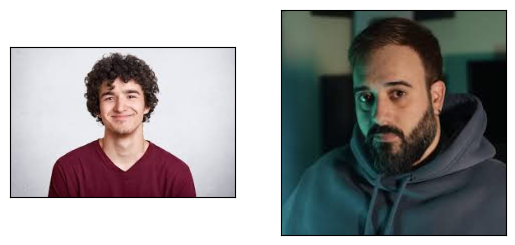

Cosine similarity:  0.50889516
Ular bir xil odam emas!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


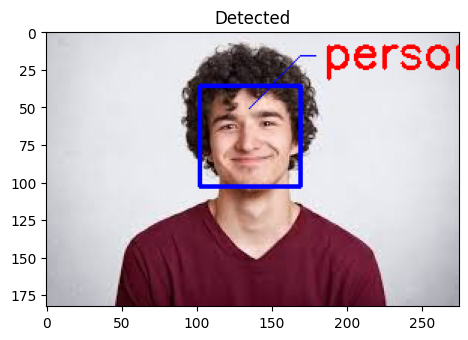

In [ ]:
import os

# Papkalarni yaratish
os.makedirs("./training_faces", exist_ok=True)
os.makedirs("./people", exist_ok=True)
os.makedirs("./group_of_faces", exist_ok=True)

print("Papkalar yaratildi")
# Test uchun rasmlarni yuklab olish
!wget -O training_faces/person1.jpg https://raw.githubusercontent.com/Davron030901/OpenCv/main/image/person1.jpg
!wget -O training_faces/person2.jpg https://raw.githubusercontent.com/Davron030901/OpenCv/main/image/person2.jpg
!wget -O people/person1.jpg https://raw.githubusercontent.com/Davron030901/OpenCv/main/image/person1.jpg
!wget -O people/person2.jpg https://raw.githubusercontent.com/Davron030901/OpenCv/main/image/person2.jpg

print("Test rasmlari yuklab olindi")
# Yuz solishtirish uchun modifitsirlangan funksiya
def verifyFace_custom(img1, img2):
    """
    Ikki rasmni solishtirish uchun funksiya
    Papka nomi parametr sifatida beriladi
    """
    # Get embedding/encoding for face1 and face2
    img1_representation = vgg_face_descriptor.predict(preprocess_image(img1))[0,:]
    img2_representation = vgg_face_descriptor.predict(preprocess_image(img2))[0,:]

    # Calculate the cosine similarity between the two embeddings
    cosine_similarity = findCosineSimilarity(img1_representation, img2_representation)

    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(image.load_img(img1))
    plt.xticks([]); plt.yticks([])
    f.add_subplot(1,2, 2)
    plt.imshow(image.load_img(img2))
    plt.xticks([]); plt.yticks([])
    plt.show(block=True)

    print("Cosine similarity: ", cosine_similarity)

    # If similarity score is less than the epsilon threshold
    if(cosine_similarity < epsilon):
        print("Ular bir xil odam")
    else:
        print("Ular bir xil odam emas!")
# HAARCascade face detector ni yuklash
!wget -O haarcascade_frontalface_default.xml https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
os.makedirs("Haarcascades", exist_ok=True)
!mv haarcascade_frontalface_default.xml Haarcascades/

# Yuzlarni ajratib olish
extract_faces = extract_faces_from_directory('./people/', './group_of_faces/')
print(f"{len(extract_faces)} ta yuz ajratib olindi")

# Yuz embedinglarini yaratish
embeddings = load_face_embeddings('./group_of_faces/')

# Test qilish - rasmlarni to'g'ridan-to'g'ri parametr sifatida beramiz
img1_path = './training_faces/person1.jpg'
img2_path = './training_faces/person2.jpg'

verifyFace_custom(img1_path, img2_path)

# Testga mos rasmda yuzlarni tanib olish
if os.path.exists('./training_faces/person1.jpg'):
    result_img = recognize_face_in_image('./training_faces/person1.jpg', embeddings)
    imshow('Detected', result_img)
else:
    print("Test rasmi mavjud emas")

# **5. Facial Recognition with One Shot Learning**
### **Extract faces from pictures of people**

#### **Instrutions:**
1. Place photos of people (one face visible) in the folder called "./people"
2. Replace my photo titled "Rajeev.jpg" with a piture of your face for testing on a webcam
3. Faces are extracted using the haarcascade_frontalface_default detector model
4. Extracted faces are placed in the folder called "./group_of_faces"
5. We are extracting the faces needed for our one-shot learning model, it will load 5 extracted faces

In [ ]:
# !gdown --id 1_X-V1Lp6qMAl_-9opsseieprD3Lhdq8U
# !unzip -qq haarcascades.zip
# !rm -rf people/.DS_Store

In [ ]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 8):
      w, h = image.shape[0], image.shape[1]
      aspect_ratio = w/h
      plt.figure(figsize=(size * aspect_ratio,size))
      plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      plt.title(title)
      plt.show()

Collected 2 images


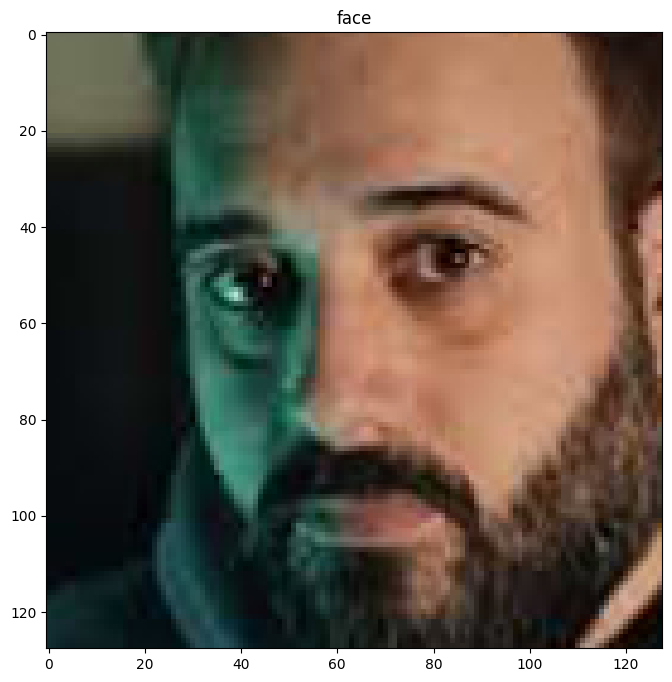

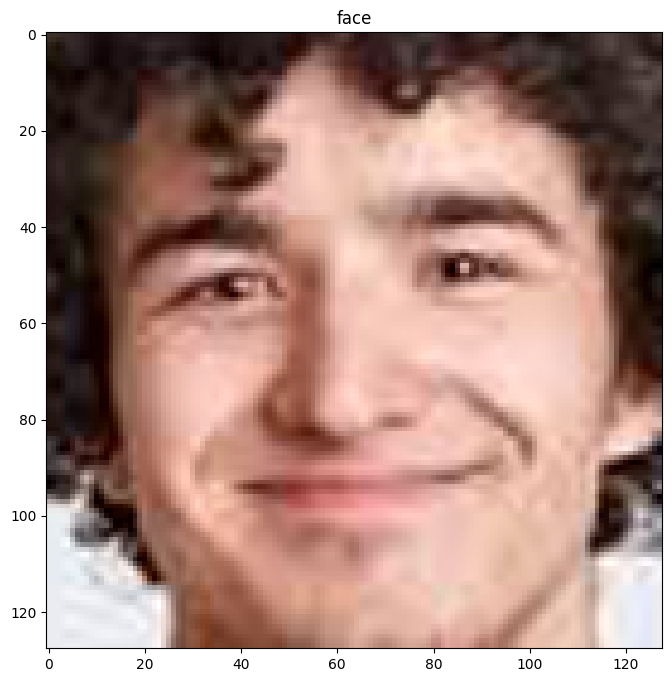

In [ ]:
# The code below extracts faces from images and places them in the folder
import os
from os import listdir
from os.path import isfile, join

# Create a function to setup the directories we'll be storing our images
def makedir(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        return None
    else:
        pass

# Loading out HAARCascade Face Detector
face_detector = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')

# Directory of image of persons we'll be extracting faces frommy
mypath = "./people/"
image_file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print("Collected " + str(len(image_file_names)) + " images")
makedir("./group_of_faces/")

for image_name in image_file_names:
    person_image = cv2.imread(mypath+image_name)
    face_info = face_detector.detectMultiScale(person_image, 1.3, 5)
    for (x,y,w,h) in face_info:
        face = person_image[y:y+h, x:x+w]
        roi = cv2.resize(face, (128, 128), interpolation = cv2.INTER_CUBIC)

    path = "./group_of_faces/" + "face_" + image_name
    cv2.imwrite(path, roi)
    imshow("face", roi)

### **Load our VGGFaceModel**
- This block of code defines the VGGFace model (which we use later) and loads the model

In [ ]:
#author Sefik Ilkin Serengil
#you can find the documentation of this code from the following link: https://sefiks.com/2018/08/06/deep-face-recognition-with-keras/

import numpy as np
import cv2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from os import listdir

def preprocess_image(image_path):
    """Loads image from path and resizes it"""
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

#you can download pretrained weights from https://drive.google.com/file/d/1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo/view?usp=sharing
from tensorflow.keras.models import model_from_json
model.load_weights('vgg_face_weights.h5')

vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

model = vgg_face_descriptor

print("Model Loaded")

Model Loaded


## **6. Test model using your Webcam**
This code looks up the faces you extracted in the "group_of_faces" folder and uses the similarity (Cosine Similarity) to detect which faces is most similar to the one being extracted with your webcam.

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

NotAllowedError: Permission denied


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Face representations retrieved successfully
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


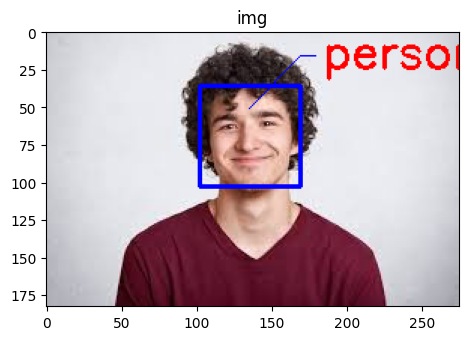

In [ ]:
#points to your extracted faces
people_pictures = "./group_of_faces/"

all_people_faces = dict()

for file in listdir(people_pictures):
    person_face, extension = file.split(".")
    try:
      all_people_faces[person_face] = model.predict(preprocess_image('./group_of_faces/%s.jpg' % (person_face)))[0,:]
    except:
      pass

print("Face representations retrieved successfully")

def findCosineSimilarity(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

img = cv2.imread('/content/training_faces/person1.jpg')
faces = face_detector.detectMultiScale(img, 1.3, 5)

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) #draw rectangle to main image
    detected_face = img[int(y):int(y+h), int(x):int(x+w)] #crop detected face
    detected_face = cv2.resize(detected_face, (224, 224)) #resize to 224x224

    img_pixels = image.img_to_array(detected_face)
    img_pixels = np.expand_dims(img_pixels, axis = 0)
    img_pixels /= 255

    captured_representation = model.predict(img_pixels)[0,:]

    found = 0
    for i in all_people_faces:
        person_name = i
        representation = all_people_faces[i]

        similarity = findCosineSimilarity(representation, captured_representation)
        if(similarity < 0.35):
            cv2.putText(img, person_name[5:], (int(x+w+15), int(y-12)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            found = 1
            break

    #connect face and text
    cv2.line(img,(int((x+x+w)/2),y+15),(x+w,y-20),(255, 0, 0),1)
    cv2.line(img,(x+w,y-20),(x+w+10,y-20),(255, 0, 0),1)

    if(found == 0): #if found image is not in our people database
        cv2.putText(img, 'unknown', (int(x+w+15), int(y-12)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

imshow('img',img)



## **7. Test on video from the Friends TV show**

Since we're using the Friends TV Series characters, let's extract the faces from the images I placed in the "./friends" folder

In [ ]:
!find . -name '.DS_Store' -type f -delete

Collected image names


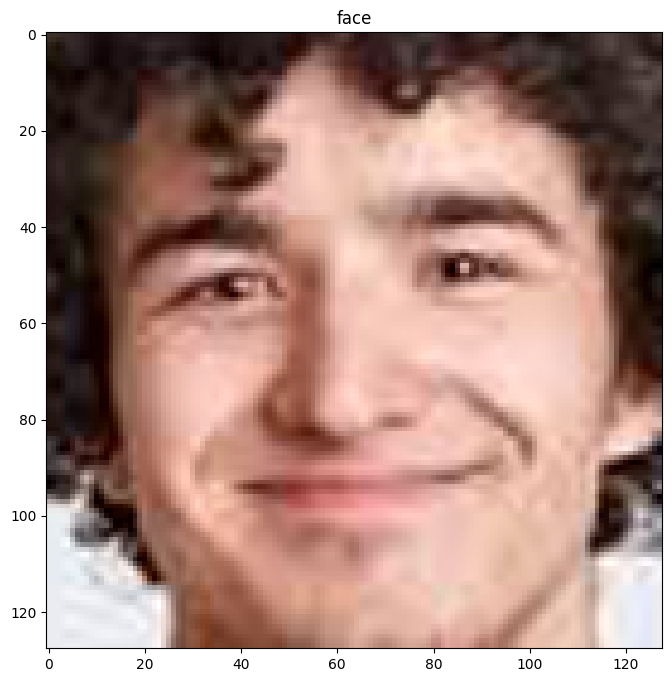

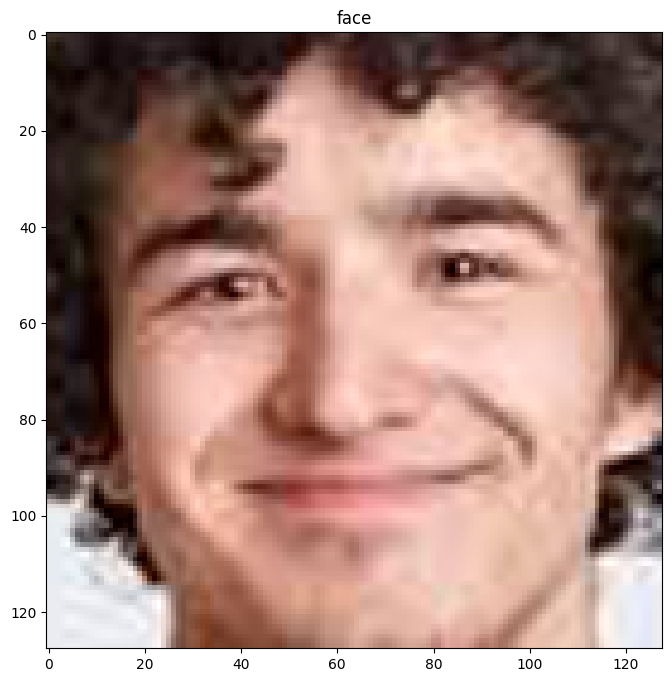

In [ ]:
from os import listdir
from os.path import isfile, join
import cv2

# Loading out HAARCascade Face Detector
face_detector = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')

# Directory of image of persons we'll be extracting faces frommy
mypath = "/content/training_faces"
image_file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print("Collected image names")
makedir("training_faces/")

for image_name in image_file_names:
    person_image = cv2.imread(mypath+image_name)
    face_info = face_detector.detectMultiScale(person_image, 1.3, 5)
    for (x,y,w,h) in face_info:
        face = person_image[y:y+h, x:x+w]
        roi = cv2.resize(face, (128, 128), interpolation = cv2.INTER_CUBIC)
    path = "training_faces/" + "face_" + image_name
    cv2.imwrite(path, roi)
    imshow("face", roi)

Again, we load our faces from the "friends_faces" directory and we run our face classifier model our test video

In [ ]:
#points to your extracted faces
people_pictures = "./friends_faces/"

all_people_faces = dict()

for file in listdir(people_pictures):
    person_face, extension = file.split(".")
    try:
      all_people_faces[person_face] = model.predict(preprocess_image('./friends_faces/%s.jpg' % (person_face)))[0,:]
    except:
      pass

print("Face representations retrieved successfully")

def findCosineSimilarity(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

cap = cv2.VideoCapture('Friends.mp4')
frame_count = 0

# Get the height and width of the frame (required to be an integer)
w = int(cap.get(3)) + 200
h = int(cap.get(4)) + 200

# Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.
out = cv2.VideoWriter('friends_face_recognition.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 30, (w, h))

while(True):
  ret, img = cap.read()
  if ret:
    #img = cv2.resize(img, (320, 180)) # Re-size video to as smaller size to improve face detection speed
    img = cv2.copyMakeBorder(img, 100, 100, 100, 100, cv2.BORDER_CONSTANT, value=[0,0,0])
    faces = face_detector.detectMultiScale(img, 1.3, 5)
    frame_count+=1
    for (x,y,w,h) in faces:
      if w > 13:
          cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) #draw rectangle to main image

          detected_face = img[int(y):int(y+h), int(x):int(x+w)] #crop detected face
          detected_face = cv2.resize(detected_face, (224, 224)) #resize to 224x224

          img_pixels = image.img_to_array(detected_face)
          ls = image.img_to_array(detected_face)
          img_pixels = np.expand_dims(img_pixels, axis = 0)
          img_pixels /= 255

          captured_representation = model.predict(img_pixels)[0,:]

          found = 0
          for i in all_people_faces:
            person_name = i
            representation = all_people_faces[i]

            similarity = findCosineSimilarity(representation, captured_representation)
            if(similarity < 0.30):
                cv2.putText(img, person_name[5:], (int(x+w+15), int(y-12)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
                found = 1
                break

            #connect face and text
            cv2.line(img,(int((x+x+w)/2),y+15),(x+w,y-20),(255, 0, 0),1)
            cv2.line(img,(x+w,y-20),(x+w+10,y-20),(255, 0, 0),1)

    imshow('img',cv2.resize(img, (640, 360)))
    # Write the frame into the file 'output.avi'
    out.write(img)
  else:
    break

cap.release()
out.release()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Face representations retrieved successfully
